In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
import re
from langdetect import detect

In [98]:
tweets = pd.read_csv('sample.csv')
account_validation = pd.read_csv('account_validation.csv')
finalhandles = pd.read_csv('finalhandles.csv')
scores = pd.read_csv('cleaned_scores.csv')

In [30]:
account_validation.head()

,handle,mtkid,listed_status,real_status,follower_range,actual_followers,isReal,tweet_count
0,damnitmikki,A2QMHQXR8K4VJ2,Public,Public,200|300,2,False,28
1,Widow Lester,AFN5VMMGYPF1I,Public,NaN,NaN,-1,-1,-1
2,kaplan175,A3L0DCUXI7X3A9,Public,Public,0|100,1,True,2
3,EvilRussianBot,A3I40B0FATY8VH,Public,Public,0|100,37,True,1833
4,CtheFrood,A2MCRVU8I9VNHG,Public,Public,0|100,8,True,129


In [56]:
account_validation.groupby('listed_status').count()

,handle,mtkid,real_status,follower_range,actual_followers,isReal,tweet_count
listed_status,,,,,,,
N/A (I do not have a Twitter account),2,2,0,0,2,2,2
Private,64,64,54,54,64,48,64
Public,409,409,370,370,409,399,409


In [57]:
account_validation.groupby('real_status').count()

,handle,mtkid,listed_status,follower_range,actual_followers,isReal,tweet_count
real_status,,,,,,,
Private,26,26,26,26,26,0,26
Public,398,398,398,398,398,398,398


In [76]:
account_validation.groupby('isReal').count()

,handle,mtkid,listed_status,real_status,follower_range,actual_followers,tweet_count
isReal,,,,,,,
-1,51,51,51,0,0,51,51
False,57,57,57,57,57,57,57
True,341,341,341,341,341,341,341


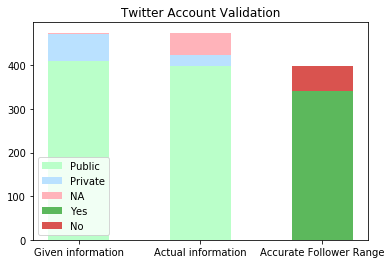

In [97]:
NA = (2, 51, 0)
private = (64,26,0)
public = (409,398,0)
yes = (0,0,341)
no = (0,0,57)
names = ['Given information','Actual information', 'Accurate Follower Range']

bars = np.add(public, private).tolist()

ind = np.arange(3) 

plt.bar(ind, public, color='#baffc9',width=0.5)
plt.bar(ind, private, bottom=public, color='#bae1ff', width=0.5)
plt.bar(ind, NA, bottom=bars, color='#ffb3ba', width=0.5)
plt.bar(ind, yes, bottom=NA, color='#5cb85c', width=0.5)
plt.bar(ind, no, bottom=yes, color='#d9534f', width=0.5)
plt.xticks(ind, names)
plt.title('Twitter Account Validation')

plt.legend(('Public', 'Private', 'NA', 'Yes', 'No'), loc='lower left')

plt.show()

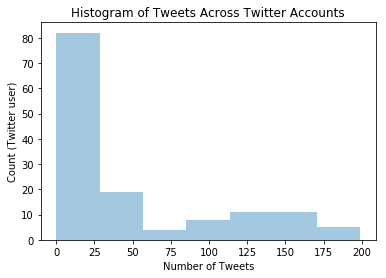

In [29]:
ax = sns.distplot(finalhandles[finalhandles['tweet_count'] < 200]['tweet_count'], kde=False)
ax.set(title='Histogram of Tweets Across Twitter Accounts', xlabel='Number of Tweets', ylabel='Count (Twitter user)')
plt.show()

In [4]:
tweets.head()

,user_id,created_at,text,is_retweet,mtkid
0,138613910,2013-12-21 18:45:29,tried adding to my Tivo and have been inform...,False,A3L0DCUXI7X3A9
1,138613910,2011-12-28 23:32:53,Why are new DC comics no longer available in ...,False,A3L0DCUXI7X3A9
2,821070135951847432,2019-05-05 02:57:22,,False,A3I40B0FATY8VH
3,821070135951847432,2019-05-05 01:17:50,I hope she sees this bro,False,A3I40B0FATY8VH
4,821070135951847432,2019-05-04 21:08:54,I wish she would Not because I want Trump go...,False,A3I40B0FATY8VH


In [24]:
tweets['user_id'].unique()

array([          138613910,  821070135951847432,  788053610814803970,
                 900197414,           107828943,           538550333,
                  42113215,            70430703,            16107135,
                 179356158,  987756705424576512,          3279807469,
                  67292880,            16049403,            42236569,
                  50374569,           243031077,            30144734,
                 353998535,  849705553844723714,            25611070,
        839245600759635968,          1265727595,            24274793,
                  79011339,            26450767, 1003404873533214720,
                 714684138,           868069182,          3306052407,
                  61257254,            29651441,          4091239701,
        879124964942544896,          2603911358,           109352348,
                  18263374,           777064440,           307088405,
                2437714868,           572762177,           869123348,
                 171

In [3]:
def tokenize_text(token_dict, text):
    line = re.sub(r"([^\x00-\x7f])|([^A-Za-z0-9'])",r' ',text)
    line = line.lower()
    for token in line.split():
        token_dict[token] += 1
    return token_dict

In [4]:
def getTokens():
    user_tokens = []
    colnames = ['user_id', 'tokenDict', 'numTokens']
    for user_id in tweets['user_id'].unique():
        tokens = defaultdict(int)
        for index, row in tweets[tweets['user_id'] == user_id].iterrows():
            tokens = tokenize_text(tokens, str(row['text']))
        user_tokens.append([user_id, sorted(tokens.items(), key=lambda k_v: k_v[1], reverse=True), 
                            len(tokens)])
    return pd.DataFrame(user_tokens, columns = colnames)

In [5]:
tokens = getTokens()

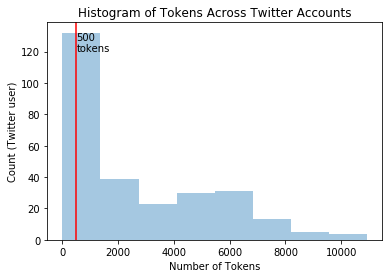

In [42]:
ax = sns.distplot(tokens['numTokens'], kde=False)
ax.set(title='Histogram of Tokens Across Twitter Accounts', xlabel='Number of Tokens', ylabel='Count (Twitter user)')
plt.axvline(500, color='red')
plt.text(x=500,y=120,s='500\ntokens', fontsize=10)
plt.show()

In [44]:
scores.head()

,mtkid,Harm,Fairness,Loyalty,Authority,Purity,ICS_score
0,A3L0DCUXI7X3A9,18,17,12,20,19,6
1,A3I40B0FATY8VH,21,24,24,15,3,8
2,A2MCRVU8I9VNHG,17,22,11,16,22,8
3,A1PJUYJ7W2LKKQ,24,24,10,17,9,-4
4,A1KZ21TSAYUHO4,25,29,16,19,29,4


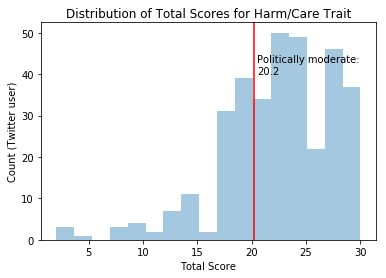

In [46]:
ax = sns.distplot(scores['Harm'], kde=False)
ax.set(title='Distribution of Total Scores for Harm/Care Trait', xlabel='Total Score', ylabel='Count (Twitter user)')
plt.axvline(20.2, color='red')
plt.text(x=20.5,y=40,s='Politically moderate:\n20.2', fontsize=10)
plt.show()

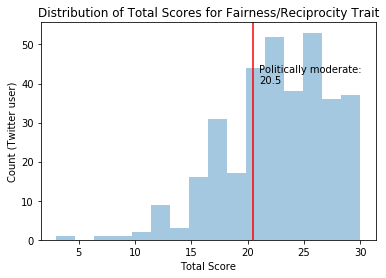

In [47]:
ax = sns.distplot(scores['Fairness'], kde=False)
ax.set(title='Distribution of Total Scores for Fairness/Reciprocity Trait', 
       xlabel='Total Score', ylabel='Count (Twitter user)')
plt.axvline(20.5, color='red')
plt.text(x=21,y=40,s='Politically moderate:\n20.5', fontsize=10)
plt.show()

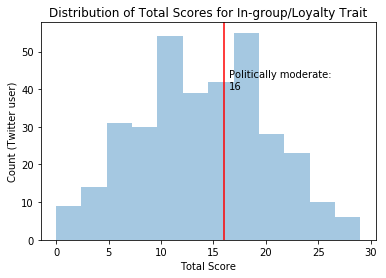

In [48]:
ax = sns.distplot(scores['Loyalty'], kde=False)
ax.set(title='Distribution of Total Scores for In-group/Loyalty Trait', 
       xlabel='Total Score', ylabel='Count (Twitter user)')
plt.axvline(16, color='red')
plt.text(x=16.5,y=40,s='Politically moderate:\n16', fontsize=10)
plt.show()

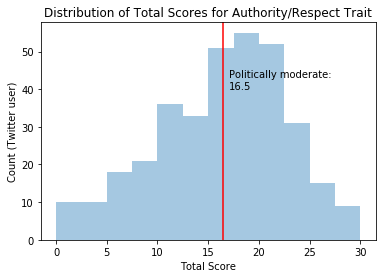

In [49]:
ax = sns.distplot(scores['Authority'], kde=False)
ax.set(title='Distribution of Total Scores for Authority/Respect Trait', 
       xlabel='Total Score', ylabel='Count (Twitter user)')
plt.axvline(16.5, color='red')
plt.text(x=17,y=40,s='Politically moderate:\n16.5', fontsize=10)
plt.show()

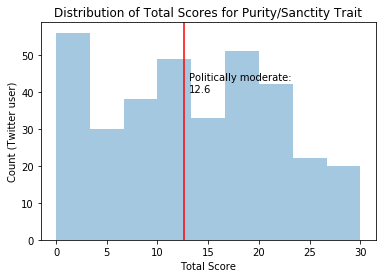

In [50]:
ax = sns.distplot(scores['Purity'], kde=False)
ax.set(title='Distribution of Total Scores for Purity/Sanctity Trait', 
       xlabel='Total Score', ylabel='Count (Twitter user)')
plt.axvline(12.6, color='red')
plt.text(x=13.1,y=40,s='Politically moderate:\n12.6', fontsize=10)
plt.show()

In [46]:
mft_only = scores.drop(columns=['mtkid', 'ICS_score'])

In [49]:
mft_corr = mft_only.corr()

In [56]:
mft_corr

,Harm,Fairness,Loyalty,Authority,Purity
Harm,1.000000,0.562782,0.124333,0.098889,0.185984
Fairness,0.562782,1.000000,-0.131598,-0.143467,-0.105537
Loyalty,0.124333,-0.131598,1.000000,0.771424,0.649790
Authority,0.098889,-0.143467,0.771424,1.000000,0.744301
Purity,0.185984,-0.105537,0.649790,0.744301,1.000000


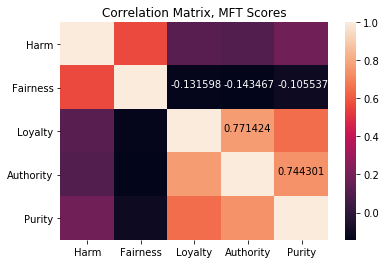

In [77]:
ax = sns.heatmap(mft_corr)
plt.text(x=3.05,y=2.5,s='0.771424', fontsize=10)
plt.text(x=2.05,y=1.5,s='-0.131598', fontsize=10, color='white')
plt.text(x=3.05,y=1.5,s='-0.143467', fontsize=10, color='white')
plt.text(x=4.05,y=1.5,s='-0.105537', fontsize=10, color='white')
plt.text(x=4.05,y=3.5,s='0.744301', fontsize=10)
ax.set(title='Correlation Matrix, MFT Scores')
plt.show()

In [67]:
score_noid = scores.drop(columns=['mtkid'])

In [68]:
score_corr = score_noid.corr()

In [69]:
score_corr

,Harm,Fairness,Loyalty,Authority,Purity,ICS_score
Harm,1.000000,0.562782,0.124333,0.098889,0.185984,-0.277896
Fairness,0.562782,1.000000,-0.131598,-0.143467,-0.105537,-0.472064
Loyalty,0.124333,-0.131598,1.000000,0.771424,0.649790,0.464286
Authority,0.098889,-0.143467,0.771424,1.000000,0.744301,0.469643
Purity,0.185984,-0.105537,0.649790,0.744301,1.000000,0.438083
ICS_score,-0.277896,-0.472064,0.464286,0.469643,0.438083,1.000000


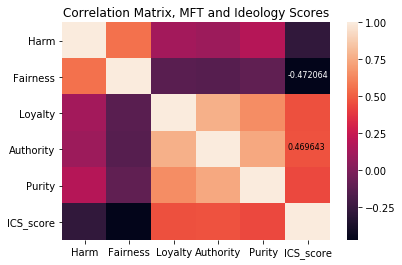

In [78]:
ax = sns.heatmap(score_corr)
plt.text(x=5.05,y=1.5,s='-0.472064', fontsize=8, color='white')
plt.text(x=5.05,y=3.5,s='0.469643', fontsize=8)
ax.set(title='Correlation Matrix, MFT and Ideology Scores')
plt.show()

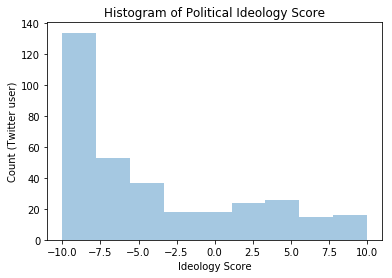

In [85]:
ax = sns.distplot(scores['ICS_score'], kde=False)
ax.set(title='Histogram of Political Ideology Score', xlabel='Ideology Score', ylabel='Count (Twitter user)')
plt.show()

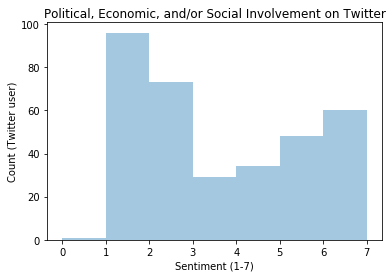

In [101]:
ax = sns.distplot(scores['Political Involvement'], kde=False)
ax.set(title='Political, Economic, and/or Social Involvement on Twitter', 
       xlabel='Sentiment (1-7)', ylabel='Count (Twitter user)')
plt.show()